In [1]:
%matplotlib inline

from skimage.io import imread, imshow, imsave
import numpy as np
import matplotlib.pyplot as plt
from skimage import img_as_float, img_as_ubyte

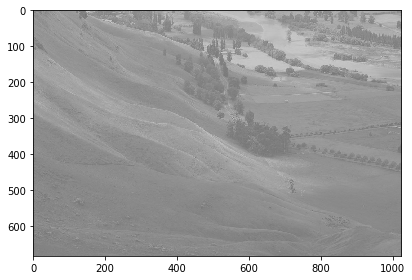

In [2]:
img = imread('images/landscape.png')
imshow(img)

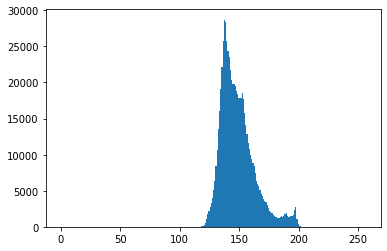

In [3]:
values, bin_edges, patches = plt.hist(img.ravel(), bins=range(257))

In [4]:
def cdf(brightness, histogram_values):
    result = 0
    for i in range(brightness):
        result += histogram_values[i]
    
    return result

In [5]:
cdf_list = []
counter = 0
for i in range(256):
    counter += values[i]
    cdf_list.append(counter)

In [6]:
np.min(cdf_list)

0.0

In [9]:
values_without_zero = list(filter(lambda x: x != 0., cdf_list))
cdf_min = np.min(values_without_zero)
cdf_min

1.0

In [10]:
n_pix = img.size

In [11]:
new_img = np.full_like(img, 0)
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        pix = img[i, j]
        new_img[i, j] = round((cdf_list[pix] - cdf_min) / (n_pix - 1) * 255)

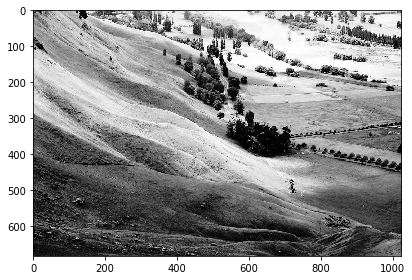

In [12]:
imshow(new_img)

<function matplotlib.pyplot.show>

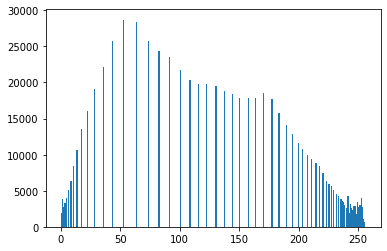

In [28]:
plt.hist(new_img.ravel(), bins=range(257))
plt.show

In [42]:
img_f = img_as_float(img)
sorted_img = np.sort(img_f.ravel())
k = round(0.05 * n_pix)
x_min = sorted_img[k]
x_max = sorted_img[-k]

In [43]:
contrast_img = (img_f - x_min) * 1. / (x_max - x_min)
contrast_img = np.clip(contrast_img, 0, 1)
contrast_img = img_as_ubyte(contrast_img)


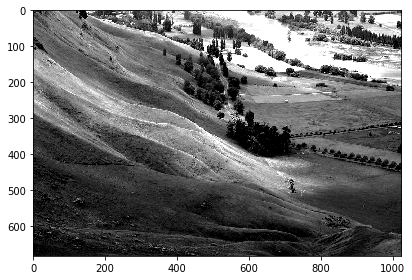

In [44]:
imshow(contrast_img)

<function matplotlib.pyplot.show>

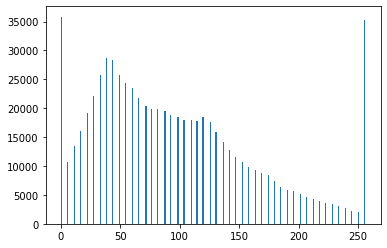

In [45]:
plt.hist(contrast_img.ravel(), bins=range(257))
plt.show

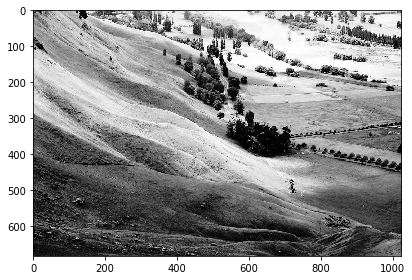

In [50]:
true_img = imread('images/landscape-histeq.png')
imshow(true_img)

In [56]:
np.array_equal(true_img, new_img)

True